In [1]:
# requirements
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Datasets

In [2]:
# dataset 4
n = 200
x_d4 = 3 * (np.random.rand(n, 4) - 0.5)
y_d4 = (2 * x_d4[:, 0] - 1 * x_d4[:,1] + 0.5 + 0.5 * np.random.randn(n)) > 0
y_d4 = 2 * y_d4 -1


# Shared handles 

In [19]:
_, dim = x_d4.shape
hat_w = np.random.rand(dim)
lam = 0.2
iterations = 50

alpha = 0.01

plot_font = {'size': 14}

def sigmoid(x):
  return 1.0 / (1.0 + np.exp(-x))

def loss(hat_w):
  loss = np.sum(np.log(1.0 + np.exp(-y_d4 * np.dot(x_d4, hat_w.T)))) + lam * np.dot(hat_w, hat_w)
  return loss

def exportPDF(filename):
  pp = PdfPages(filename)
  pp.savefig()
  pp.close()

# Implement batch steepest gradient method

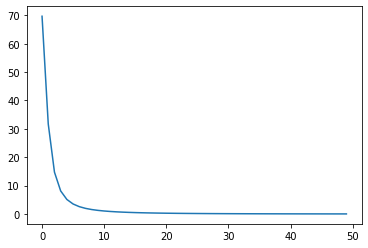

In [4]:
initial_loss = loss(hat_w)
loss_hist_batch = [initial_loss]
loss_diff_batch = []

for t in range(iterations):
  gradient = np.sum((1.0 - sigmoid(y_d4 * np.dot(x_d4, hat_w.T))) * (-y_d4) * x_d4.T, axis = 1) + 2 * lam * hat_w

  hat_w -= alpha * gradient

  current_loss = loss(hat_w)
  loss_hist_batch.append(current_loss)
  loss_diff_batch.append(loss_hist_batch[t] - current_loss)

# Implement Newton based method

In [5]:
loss_hist_newton = [initial_loss]
loss_diff_newton = []

for t in range(iterations):
  prior = sigmoid(y_d4 * np.dot(x_d4, hat_w.T))
  gradient = np.sum((1.0 - prior) * (-y_d4) * x_d4.T, axis = 1) + 2 * lam * hat_w

  hessian = np.zeros((dim, dim))
  for i in range(len(x_d4)):
    hessian += prior[i] * (1.0 - prior[i]) * np.outer(x_d4[i], x_d4[i])
  hessian += 2 * lam * np.eye(dim)

  hat_w -= alpha * np.linalg.inv(hessian).dot(gradient)
  current_loss = loss(hat_w)
  loss_hist_newton.append(current_loss)
  loss_diff_newton.append(loss_hist_newton[t] - current_loss)

# Compare the performance of the above two optimization methods by showing loss difference between every iteration

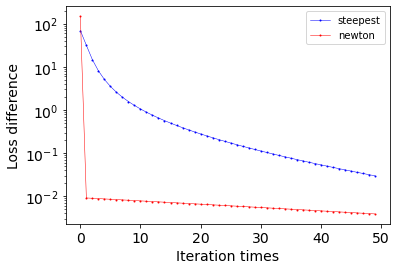

In [23]:
# Plotter format
plt.yscale('log')
plt.xticks(fontSize=14)
plt.yticks(fontSize=14)
plt.xlabel('Iteration times', fontdict=plot_font)
plt.ylabel('Loss difference', fontdict=plot_font)

# Plot the results
plt.plot(loss_diff_batch, 'bo-', linewidth=0.5, markersize=1, label='steepest')
plt.plot(loss_diff_newton, 'ro-', linewidth=0.5, markersize=1, label='newton')
plt.legend()

plt.subplots_adjust(left=0.15)

exportPDF('loss-difference-binary-logisitic.pdf')